In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install --upgrade matplotlib

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import numpy as np

%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

In [ ]:
path = "/content/drive/MyDrive/multicampus/data/"

In [ ]:
geo_str = json.load(open(path + "seoul_geo.json", encoding="utf-8"))

# 서울특별시 전동킥보드 견인 현황

In [99]:
data = pd.read_csv(path + "서울특별시_전동킥보드_견인_현황_20220731.csv", encoding="cp949")
data.dropna(inplace=True)
data["신고연월"] = data["신고일"].apply(lambda x: x[:7])
data["신고분기"] = data["신고연월"].apply(lambda x: x[:-2]+str((int(x[-2:])+2)//3))
data.drop(data[data["신고연월"]=="2022-07"].index, inplace=True)

## 신고 장소
- 보도와 차도가 구분된 도로의 차도
- 횡단보도, 산책로 등
- 버스정류장, 택시정거장
- 점자블록, 엘리베이터 입구
- 지하철역 진출입로 및 주변
- 보도 중앙
- 자전거 도로

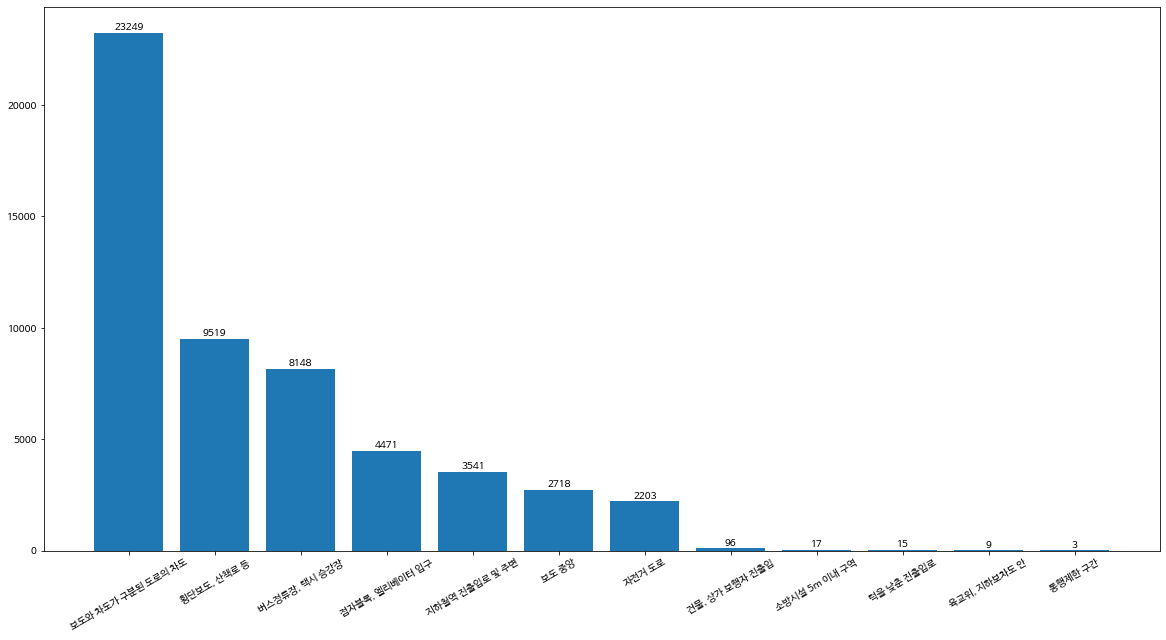

In [38]:
temp = data.groupby("유형")["번호"].count().drop(labels=["오신고", "기타"]).sort_values(ascending=False)
x = temp.index
y = temp

plt.figure(figsize=(20, 10))
p = plt.bar(x=x, height=y)
plt.xticks(rotation=30)
plt.bar_label(p)
plt.show()

## 자치구

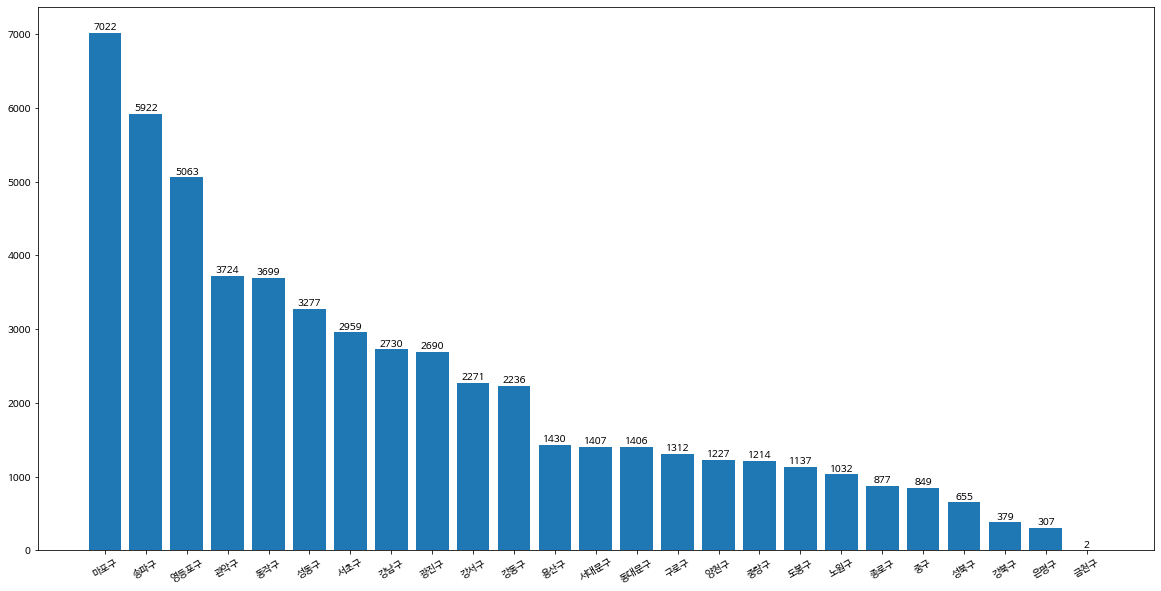

In [ ]:
temp = data.groupby("구정보")["번호"].count().sort_values(ascending=False)
x = temp.index
y = temp

plt.figure(figsize=(20, 10))
p = plt.bar(x=x, height=y)
plt.xticks(rotation=30)
plt.bar_label(p)
plt.show()

In [ ]:
temp = pd.DataFrame(data.groupby("구정보")["번호"].count().sort_values(ascending=False)).reset_index().rename({"구정보":"구별", "번호":"견인수"}, axis=1)

seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

fmap = folium.Choropleth(geo_data=geo_str,
                         data=temp,
                         columns=["구별", "견인수"],
                         fill_color="PuBu", 
                         line_opacity=0.5,
                         key_on="feature.properties.name",
                         highlight=True).add_to(seoul_map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(folium.features.GeoJsonTooltip(["name"],labels=False))
display(seoul_map)

## 신고연월

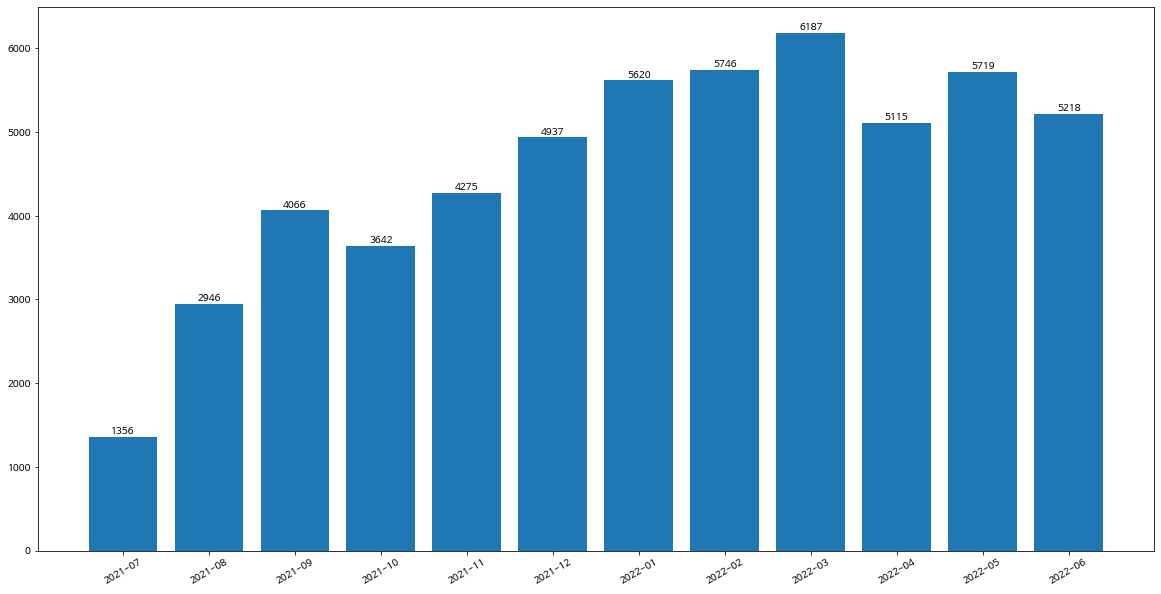

In [ ]:
temp = data.groupby("신고연월")["번호"].count()
x = temp.index
y = temp

plt.figure(figsize=(20, 10))
p = plt.bar(x=x, height=y)
plt.xticks(rotation=30)
plt.bar_label(p)
plt.show()

## 신고분기

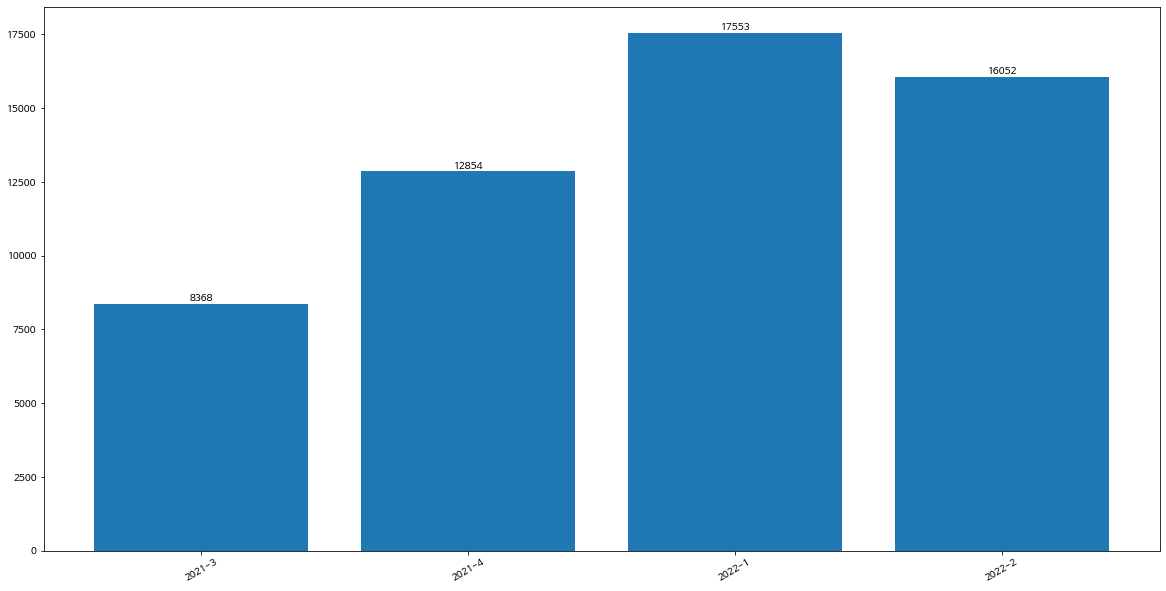

In [100]:
temp = data.groupby("신고분기")["번호"].count()
x = temp.index
y = temp

plt.figure(figsize=(20, 10))
p = plt.bar(x=x, height=y)
plt.xticks(rotation=30)
plt.bar_label(p)
plt.show()

## 월별 분석

In [ ]:
data.pivot_table(values="번호", index=["신고연월"], columns=["구정보"], aggfunc="count", fill_value=0)

구정보,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고연월,,,,,,,,,,,,,,,,,,,,,
2021-07,0,0,0,0,0,0,0,0,0,64,...,0,0,265,0,498,1,0,0,1,0
2021-08,1,0,0,0,197,0,0,0,0,34,...,74,45,523,0,696,0,0,94,2,0
2021-09,1,487,0,0,400,514,2,1,0,6,...,477,57,471,0,447,0,0,90,2,200
2021-10,0,410,0,0,366,83,139,0,0,5,...,411,52,475,33,507,0,0,100,2,194
2021-11,0,402,0,292,364,17,345,0,69,153,...,0,67,553,225,580,0,0,99,0,131
2021-12,0,299,75,248,419,226,269,0,293,114,...,83,66,581,209,579,216,58,100,0,89
2022-01,403,46,30,271,367,600,132,0,139,128,...,254,46,504,195,249,216,124,80,158,36
2022-02,403,102,12,275,282,680,67,0,109,43,...,328,30,452,94,236,193,43,71,225,20
2022-03,401,142,64,323,330,570,122,0,136,92,...,375,72,500,176,306,201,16,79,138,107


구정보
마포구     0.0
송파구     0.0
영등포구    0.0
관악구     0.0
동작구     0.0
성동구     0.0
서초구     0.0
강남구     0.0
광진구     0.0
강서구     0.0
dtype: float64

In [114]:
temp

신고분기,2021-3,2021-4,2022-1,2022-2
구정보,,,,
마포구,1480,1325,2450,1767
송파구,1259,1609,1456,1598
영등포구,1641,1666,791,965
관악구,597,1149,979,999
동작구,915,1039,713,1032
성동구,551,494,957,1275
서초구,2,5,1852,1100
강남구,2,0,1207,1521
광진구,514,326,1850,0


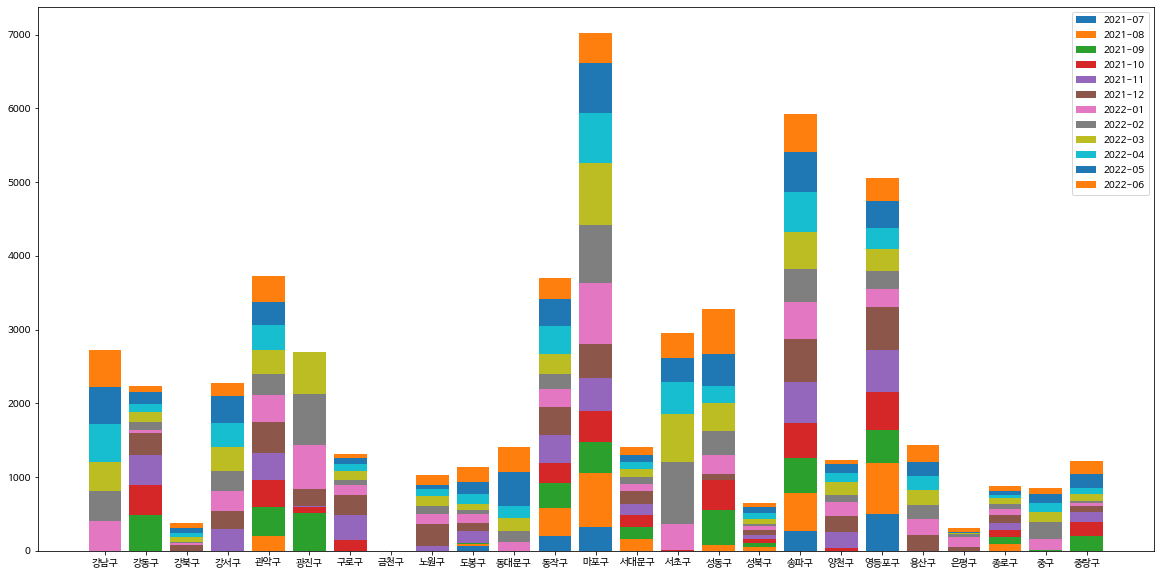

In [115]:
temp = data.pivot_table(values="번호", index=["구정보"], columns=["신고연월"], aggfunc="count", fill_value=0)

bottom = pd.Series(np.zeros(len(temp)), index=temp.index)

plt.figure(figsize=(20, 10))

for col in temp.columns:
    plt.bar(temp.index, temp[col], bottom=bottom, label=col)
    bottom = bottom + temp[col]
    
plt.legend()
plt.show()

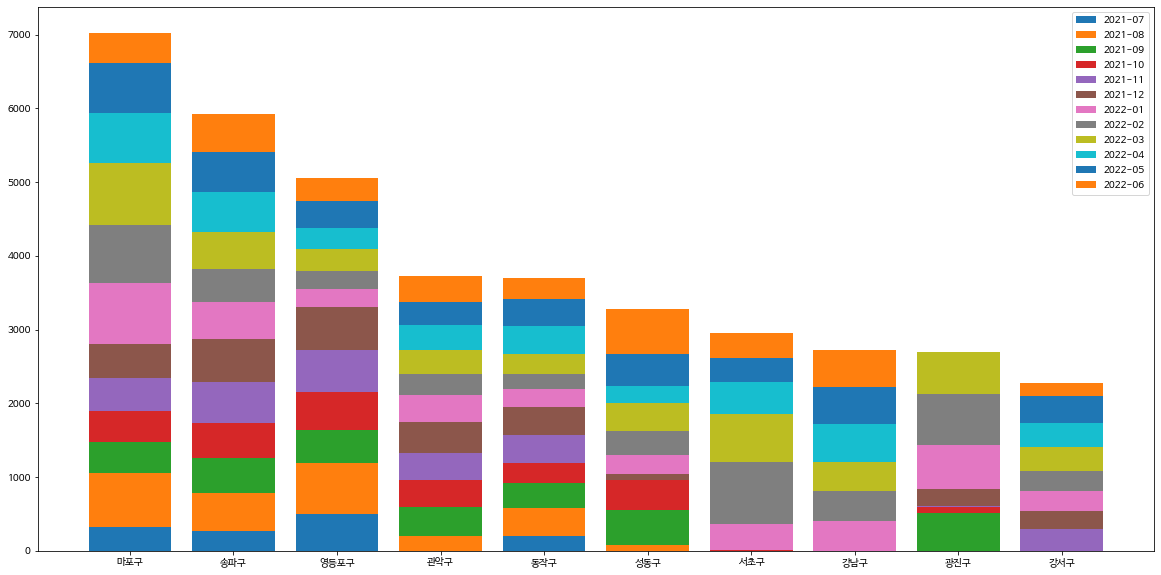

In [116]:
temp_index = data.groupby("구정보")["번호"].count().sort_values(ascending=False)[:10].index
temp = data.pivot_table(values="번호", index=["신고연월"], columns=["구정보"], aggfunc="count", fill_value=0)[temp_index].T

bottom = pd.Series(np.zeros(len(temp)), index=temp.index)

plt.figure(figsize=(20, 10))

for col in temp.columns:
    plt.bar(temp.index, temp[col], bottom=bottom, label=col)
    bottom = bottom + temp[col]
    
plt.legend()
plt.show()

## 분기별 분석

In [101]:
data.pivot_table(values="번호", index=["신고분기"], columns=["구정보"], aggfunc="count", fill_value=0)

구정보,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고분기,,,,,,,,,,,,,,,,,,,,,
2021-3,2,487,0,0,597,514,2,1,0,104,...,551,102,1259,0,1641,1,0,184,5,200
2021-4,0,1111,75,540,1149,326,753,0,362,272,...,494,185,1609,467,1666,216,58,299,2,414
2022-1,1207,290,106,869,979,1850,321,0,384,263,...,957,148,1456,465,791,610,183,230,521,163
2022-2,1521,348,198,862,999,0,236,1,286,498,...,1275,220,1598,295,965,603,66,164,321,437


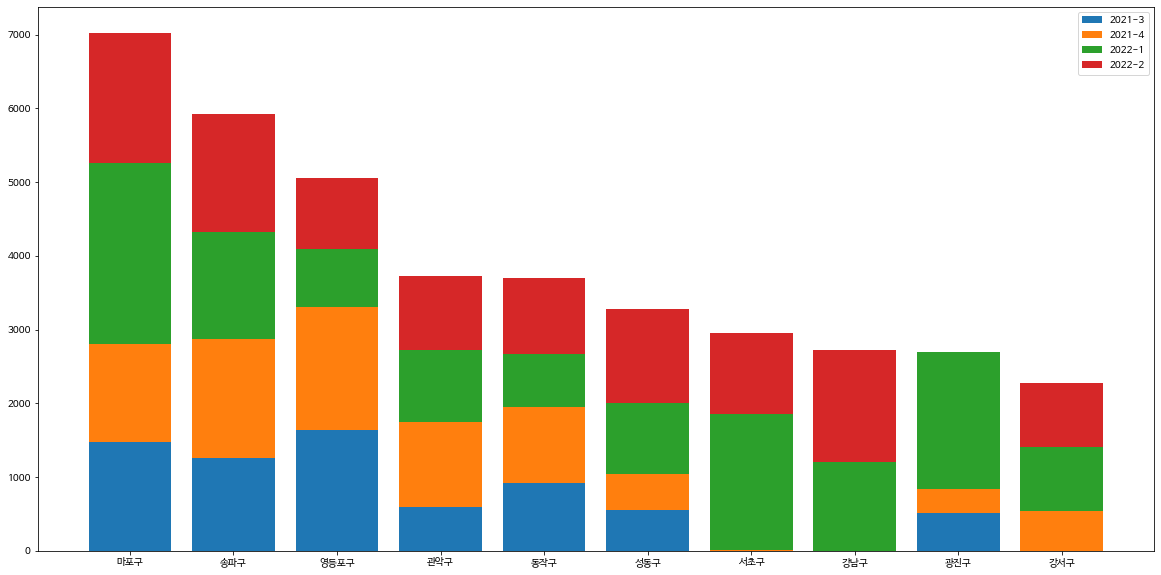

In [117]:
temp_index = data.groupby("구정보")["번호"].count().sort_values(ascending=False)[:10].index
temp = data.pivot_table(values="번호", index=["신고분기"], columns=["구정보"], aggfunc="count", fill_value=0)[temp_index].T

bottom = pd.Series(np.zeros(len(temp)), index=temp.index)

plt.figure(figsize=(20, 10))

for col in temp.columns:
    plt.bar(temp.index, temp[col], bottom=bottom, label=col)
    bottom = bottom + temp[col]

plt.legend()
plt.show()

# TAAS 교통사고분석시스템

## 사고유형별 가해운전자 차종별 교통사고

In [ ]:
data = pd.read_excel(path + "사고유형별 가해운전자 차종별 교통사고.xls", skiprows=2)
data = data.drop([f"{x}.1" for x in range(2017, 2022)], axis=1)
data = data.iloc[1:-1, :]
data = data[(data["사고유형대분류"]!="합계") & (data["사고유형중분류"]!="합계") & (data["사고년도"]!="(중상자수)") & (data["사고년도"]!="(경상자수)")]
data = data.replace("-", "0")
data = pd.wide_to_long(data, ["2"], i=["사고유형대분류", "사고유형중분류", "사고년도"], j="연도").reset_index()
data.loc[:, "연도"].replace({17:"2017", 18:"2018", 19:"2019", 0:"2020", 1:"2021"}, inplace=True)
data = data.rename({"사고년도":"종류", "2":"수"}, axis=1)
data.loc[:, "수"] = data.loc[:, "수"].apply(lambda x: int(x))
data["사고유형"] = data["사고유형대분류"] + "/" + data["사고유형중분류"]

In [ ]:
data.head()

,사고유형대분류,사고유형중분류,종류,연도,수,사고유형
0,차대사람,횡단중,사고건수,2017,6,차대사람/횡단중
1,차대사람,횡단중,사고건수,2018,12,차대사람/횡단중
2,차대사람,횡단중,사고건수,2019,29,차대사람/횡단중
3,차대사람,횡단중,사고건수,2020,46,차대사람/횡단중
4,차대사람,횡단중,사고건수,2021,105,차대사람/횡단중


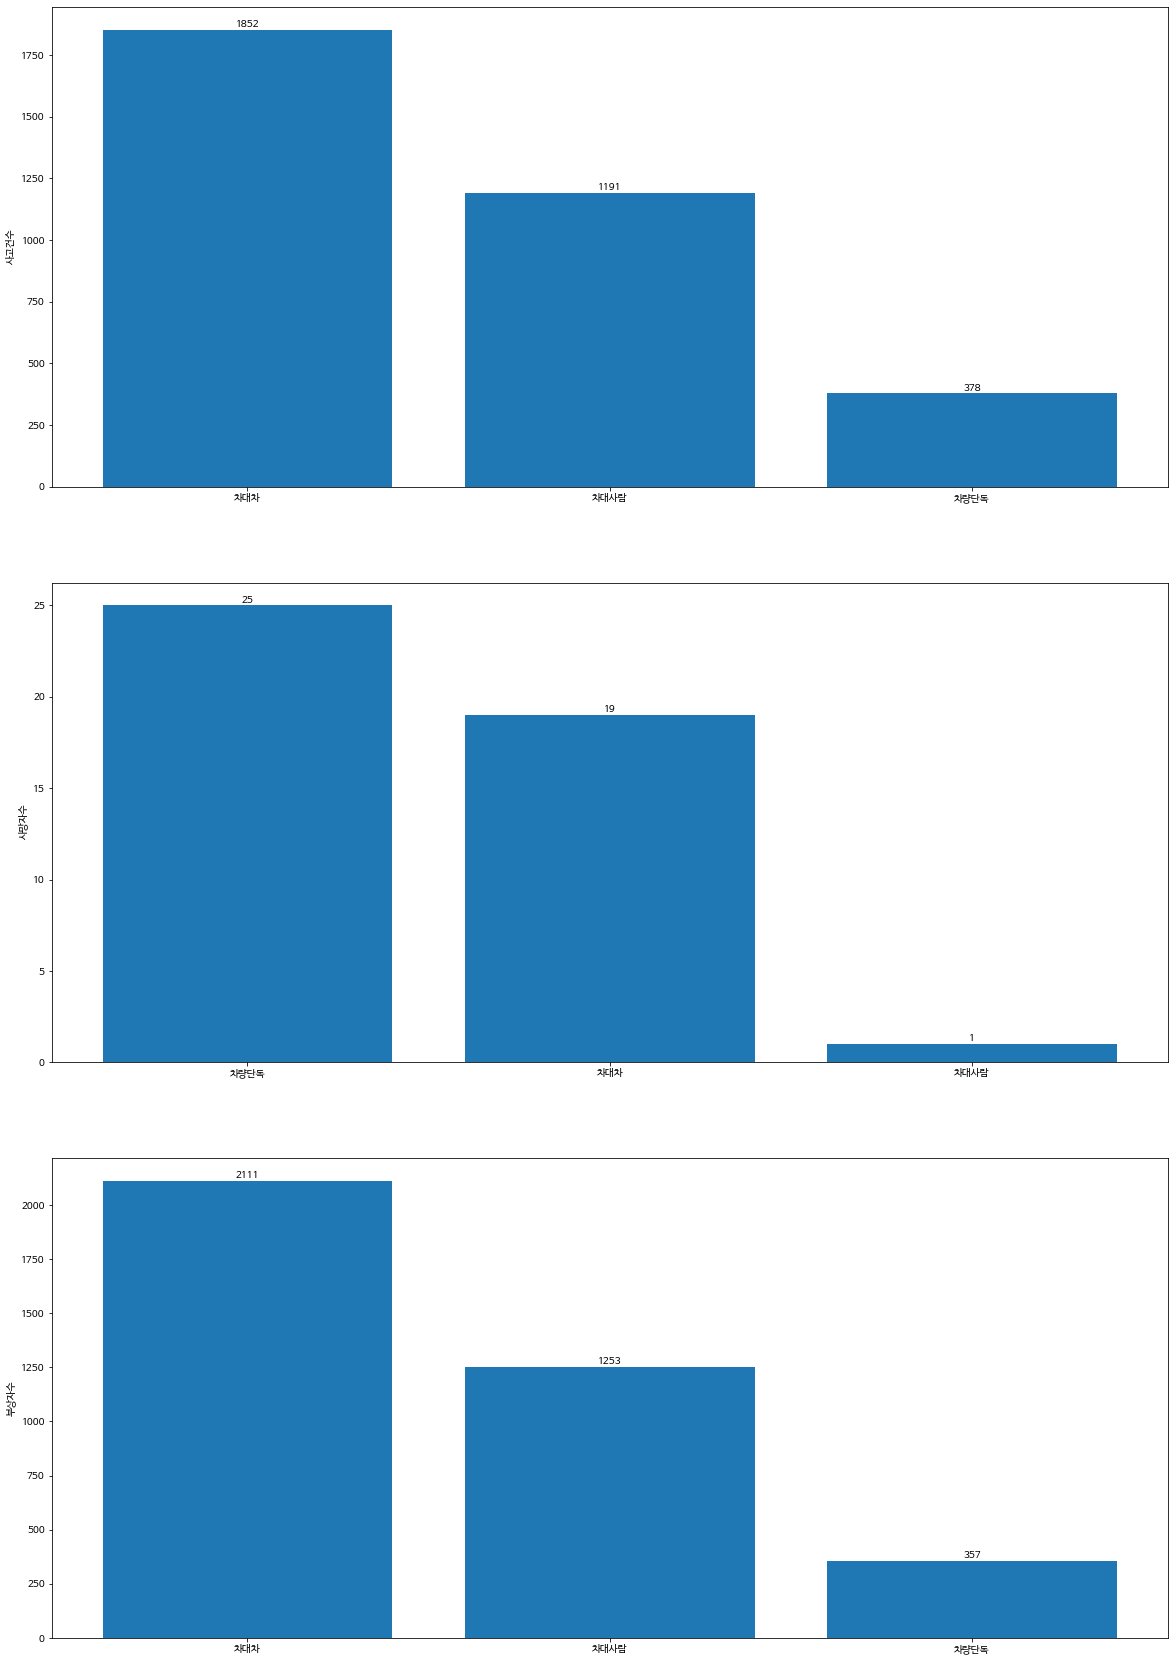

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 30))
for i, value in enumerate(data["종류"].unique()):
    temp = data[data["종류"]==value].groupby("사고유형대분류")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
plt.show()

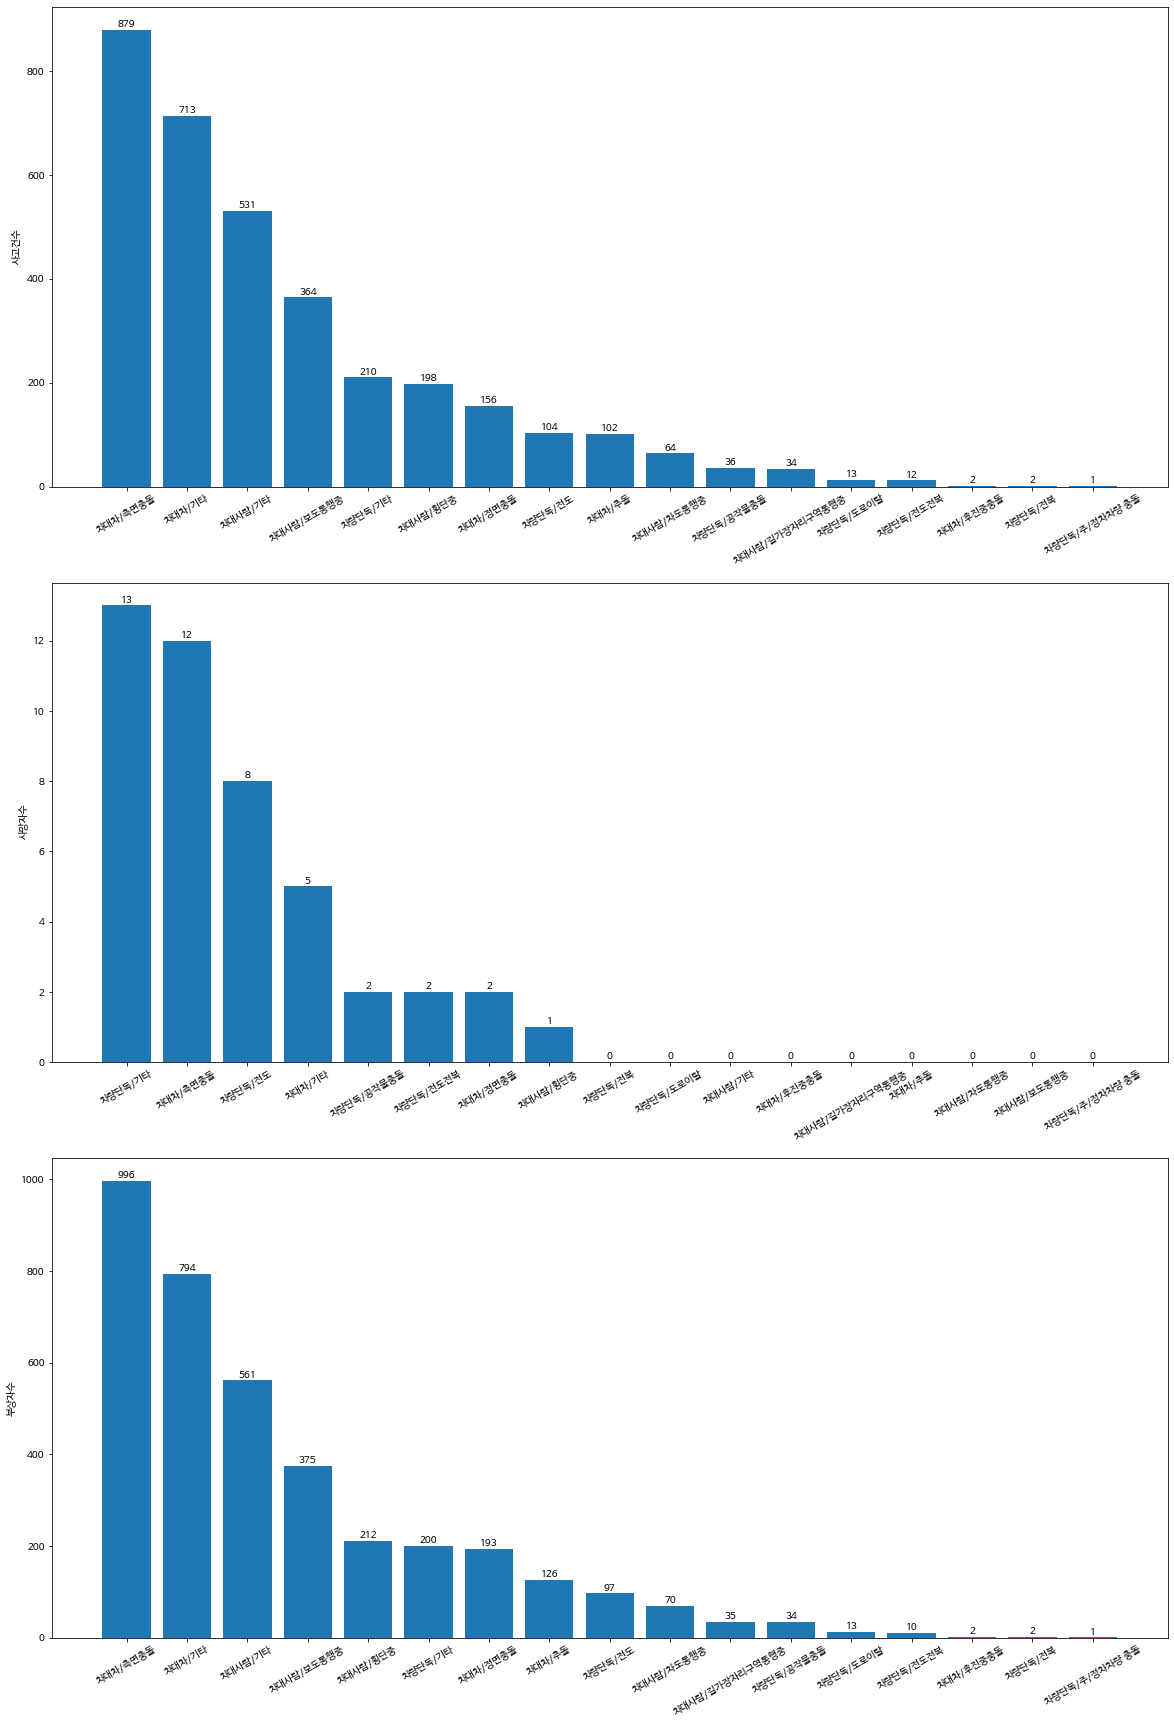

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 30))
for i, value in enumerate(data["종류"].unique()):
    temp = data[data["종류"]==value].groupby("사고유형")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=30)
plt.show()

## 시도, 시군구별 가해운전자 차종별 교통사고

In [ ]:
data = pd.read_excel(path + "시도, 시군구별 가해운전자 차종별 교통사고.xls")

data = data.drop([f"{x}.1" for x in range(2017, 2022)], axis=1)
data = data.iloc[4:-1, :]
data = data[(data["시도"]!="합계") & (data["시군구"]!="합계")]
data = data.replace("-", "0")
data = pd.wide_to_long(data, ["2"], i=["시도", "시군구", "사고년도"], j="연도").reset_index()
data.loc[:, "연도"].replace({17:"2017", 18:"2018", 19:"2019", 0:"2020", 1:"2021"}, inplace=True)
data = data.rename({"사고년도":"종류", "2":"수"}, axis=1)
data.loc[:, "수"] = data.loc[:, "수"].apply(lambda x: int(x))

In [ ]:
data.head()

,시도,시군구,종류,연도,수
0,서울,종로구,사고건수,2017,2
1,서울,종로구,사고건수,2018,3
2,서울,종로구,사고건수,2019,1
3,서울,종로구,사고건수,2020,7
4,서울,종로구,사고건수,2021,4


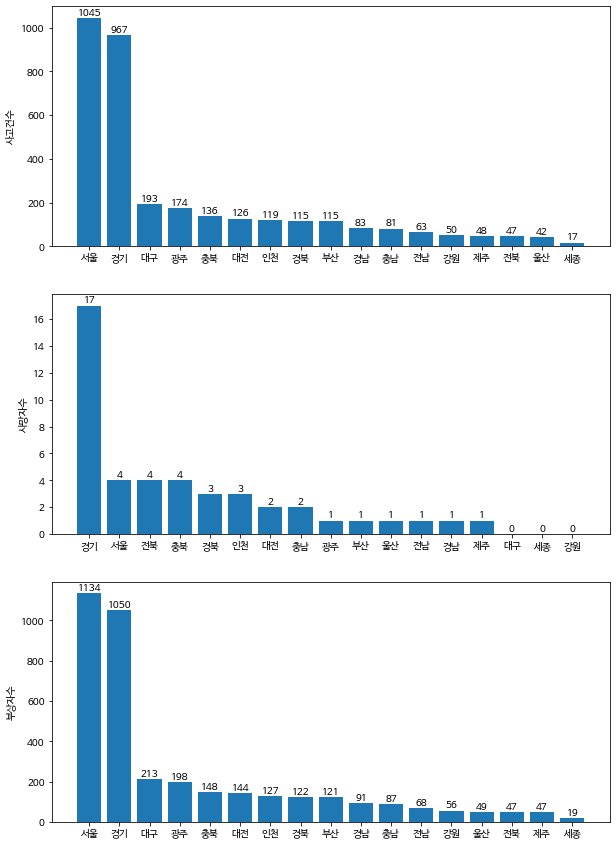

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(data["종류"].unique()):
    temp = data[data["종류"]==value].groupby("시도")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
plt.show()

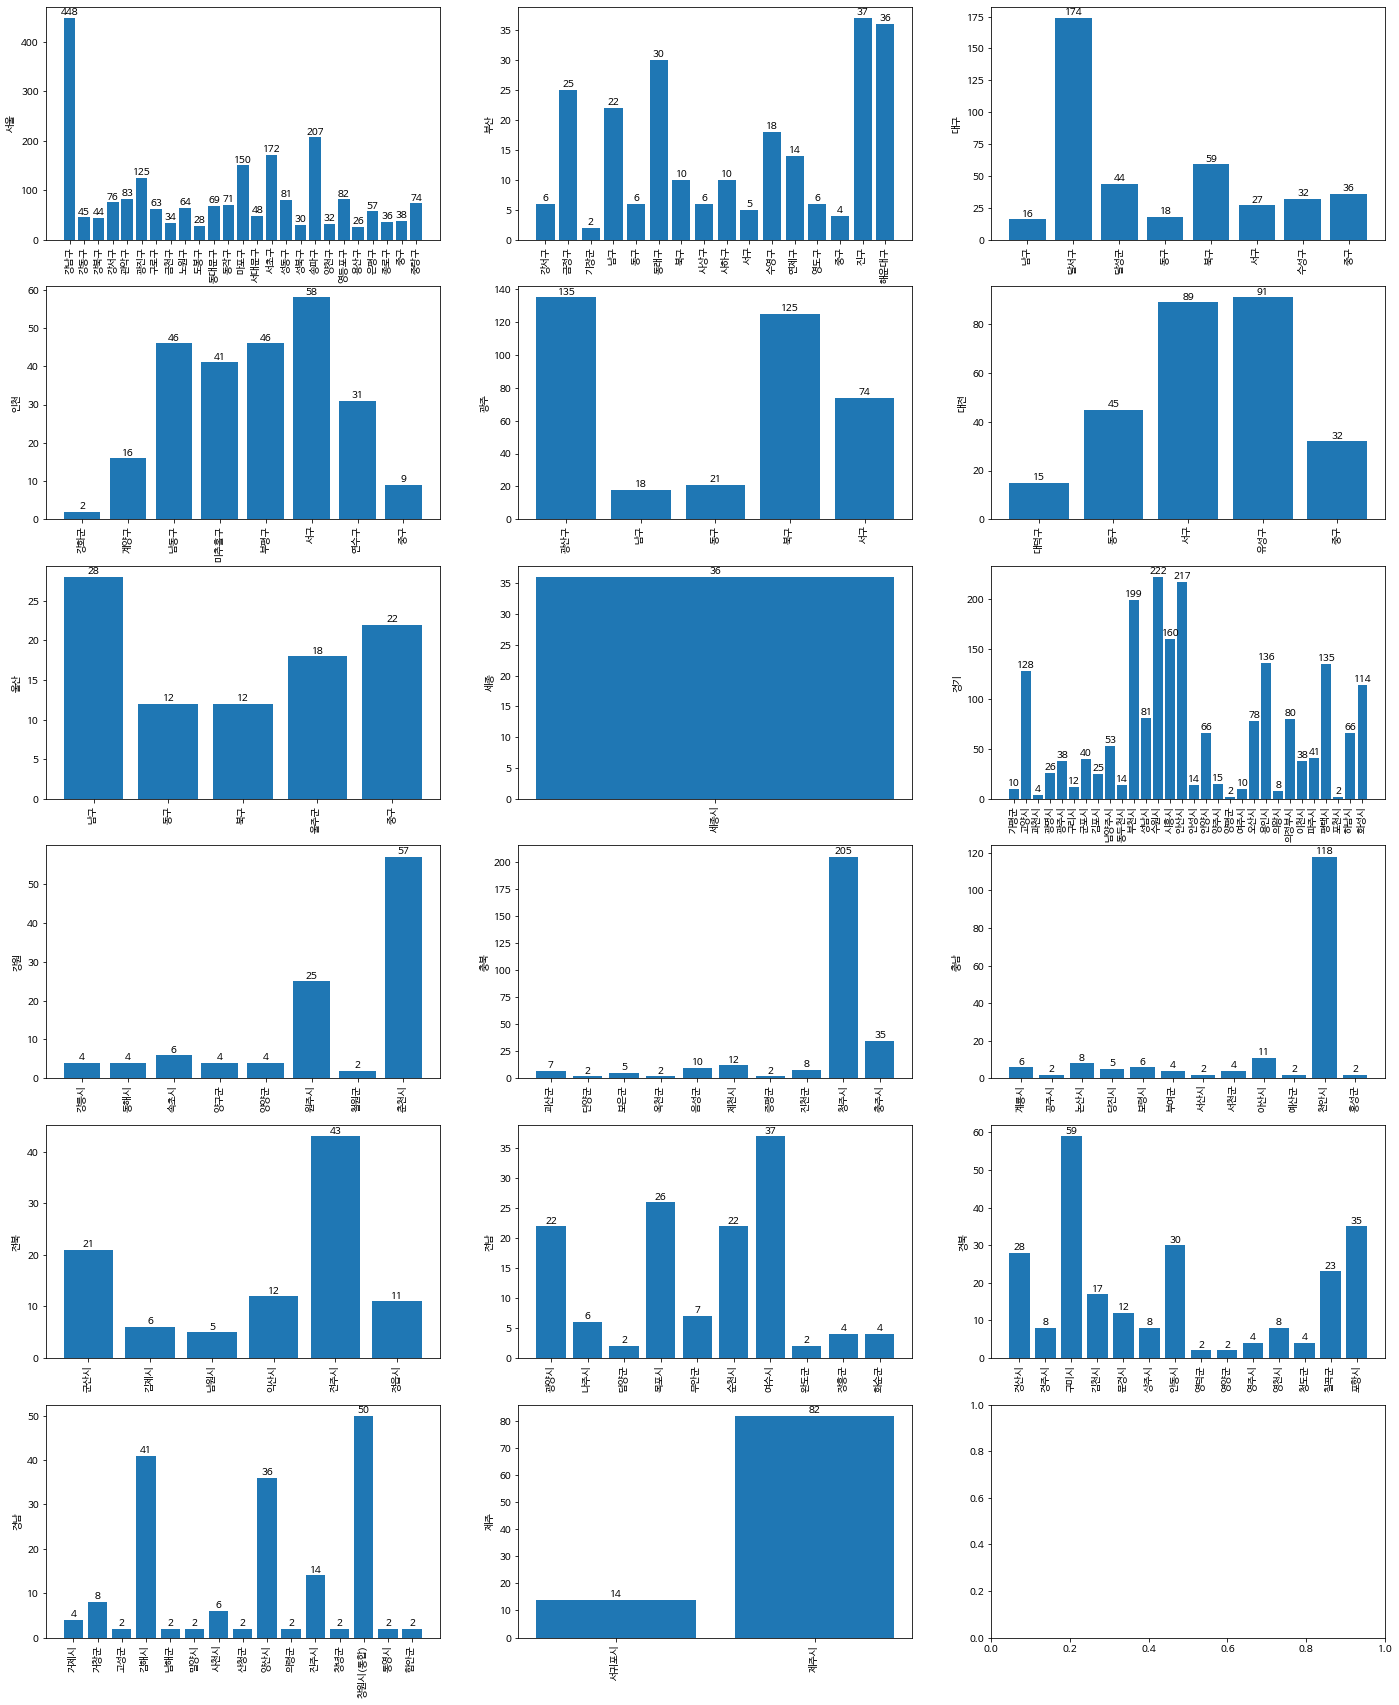

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(24, 30))

for i, value in enumerate(data["시도"].unique()):
    temp = data[data["시도"]==value].groupby("시군구")["수"].sum().sort_index(ascending=True)
    x = temp.index
    y = temp
    p = ax[i//3, i%3].bar(x=x, height=y)
    ax[i//3, i%3].bar_label(p)
    ax[i//3, i%3].set_ylabel(value)
    ax[i//3, i%3].set_xticks(ax[i//3, i%3].get_xticks(), ax[i//3, i%3].get_xticklabels(), rotation=90)

plt.show()

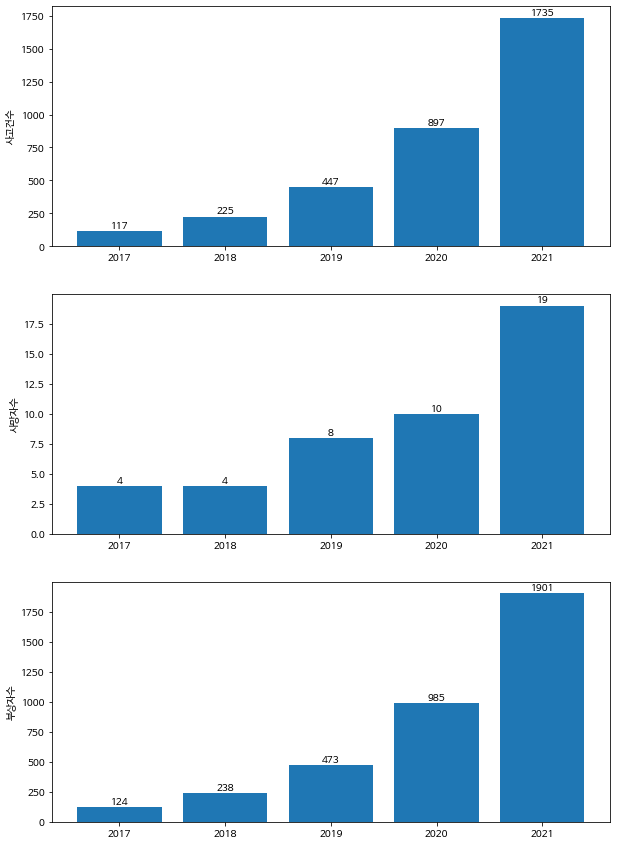

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(data["종류"].unique()):
    temp = data[data["종류"]==value].groupby("연도")["수"].sum().sort_index(ascending=True)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
plt.show()

## 가해운전자 차종별 피해운전자 차종별 교통사고

### 가해운전자 차종이 PM

In [ ]:
data = pd.read_excel(path + "가해운전자 차종별 피해운전자 차종별 교통사고.xls")

data = data.iloc[:-1, :]
data = data[data["가해운전자 차종별 "]=="개인형이동수단(PM)"]
data = data[(data["가해운전자 차종별 "]!="합계") & (data["피해운전자 차종 대분류 "]!="합계") & (data["가해운전자 차종별 "]!="불명") & (data["피해운전자 차종 대분류 "]!="불명")]

data = data.replace("-", "0")
data = pd.wide_to_long(data, ["2"], i=["가해운전자 차종별 ", "피해운전자 차종 대분류 ", "사고년도"], j="연도").reset_index()
data.loc[:, "연도"].replace({17:"2017", 18:"2018", 19:"2019", 0:"2020", 1:"2021"}, inplace=True)
data = data.rename({"가해운전자 차종별 ":"가해", "피해운전자 차종 대분류 ":"피해", "사고년도":"종류", "2":"수"}, axis=1)
data.loc[:, "수"] = data.loc[:, "수"].apply(lambda x: int(x))

In [ ]:
data.head()

,가해,피해,종류,연도,수
0,개인형이동수단(PM),승용차,사고건수,2017,31
1,개인형이동수단(PM),승용차,사고건수,2018,87
2,개인형이동수단(PM),승용차,사고건수,2019,157
3,개인형이동수단(PM),승용차,사고건수,2020,304
4,개인형이동수단(PM),승용차,사고건수,2021,567


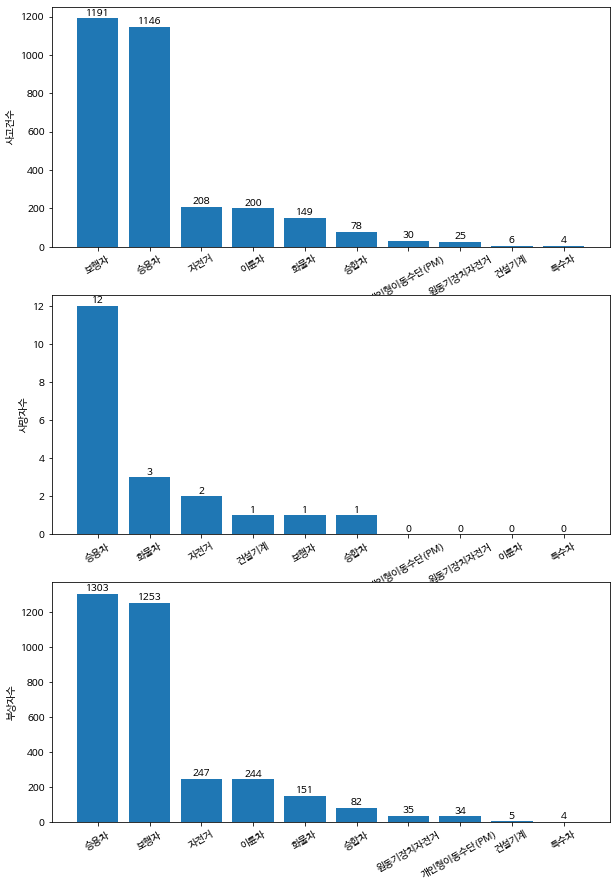

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(data["종류"].unique()):
    temp = data[data["종류"]==value].groupby("피해")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=30)
plt.show()

### 피해운전자 차종이 PM

In [ ]:
data = pd.read_excel(path + "가해운전자 차종별 피해운전자 차종별 교통사고.xls")

data = data.iloc[:-1, :]
data = data[data["피해운전자 차종 대분류 "]=="개인형이동수단(PM)"]
data = data[(data["가해운전자 차종별 "]!="합계") & (data["피해운전자 차종 대분류 "]!="합계") & (data["가해운전자 차종별 "]!="불명") & (data["피해운전자 차종 대분류 "]!="불명")]

data = data.replace("-", "0")
data = pd.wide_to_long(data, ["2"], i=["가해운전자 차종별 ", "피해운전자 차종 대분류 ", "사고년도"], j="연도").reset_index()
data.loc[:, "연도"].replace({17:"2017", 18:"2018", 19:"2019", 0:"2020", 1:"2021"}, inplace=True)
data = data.rename({"가해운전자 차종별 ":"가해", "피해운전자 차종 대분류 ":"피해", "사고년도":"종류", "2":"수"}, axis=1)
data.loc[:, "수"] = data.loc[:, "수"].apply(lambda x: int(x))

In [ ]:
data.head()

,가해,피해,종류,연도,수
0,승용차,개인형이동수단(PM),사고건수,2017,90
1,승용차,개인형이동수단(PM),사고건수,2018,190
2,승용차,개인형이동수단(PM),사고건수,2019,327
3,승용차,개인형이동수단(PM),사고건수,2020,441
4,승용차,개인형이동수단(PM),사고건수,2021,785


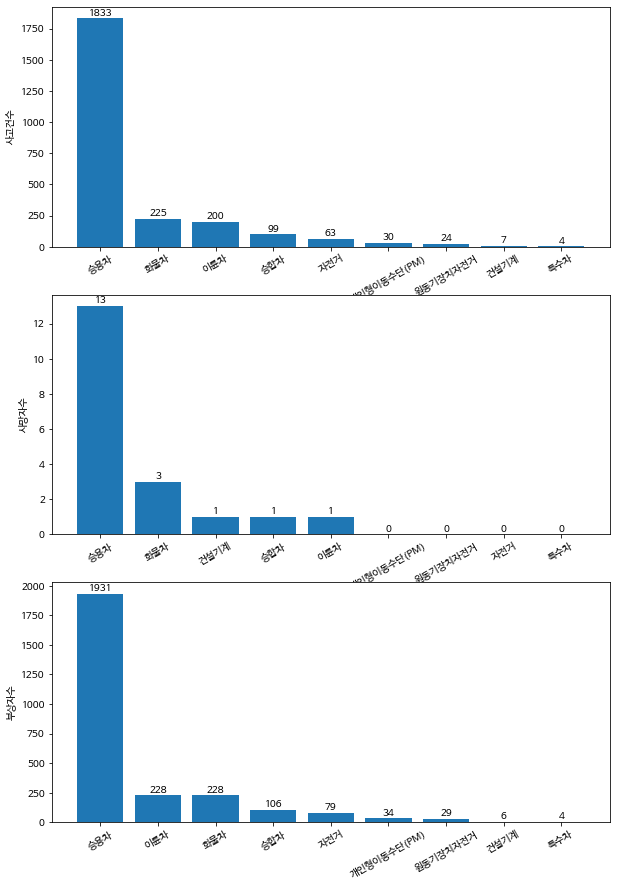

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(data["종류"].unique()):
    temp = data[data["종류"]==value].groupby("가해")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=30)
plt.show()

## 가해운전자 차량용도별 교통사고

In [119]:
def return_long(kind):
    temp = pd.read_excel(path + f"가해운전자 차량용도별 {kind}별 교통사고.xls")

    for col in temp.columns[:-6]:
        temp = temp[temp[col]!="합계"]

    temp = temp.iloc[:-1, 2:].replace("-", "0").reset_index()

    if len(temp.columns) == 8:
        temp = pd.wide_to_long(temp, ["2"], i=temp.columns[:3], j="연도").reset_index()
        temp.drop(["index"], axis=1, inplace=True)
        temp.columns = ["대구분", "수치", "연도", "수"]
    elif len(temp.columns) == 9:
        temp = pd.wide_to_long(temp, ["2"], i=temp.columns[:4], j="연도").reset_index()
        temp.drop(["index"], axis=1, inplace=True)
        temp.columns = ["대구분", "소구분", "수치", "연도", "수"]

    temp.loc[:, "수"] = temp.loc[:, "수"].apply(lambda x: int(x))
    temp.loc[:, "연도"] = temp.loc[:, "연도"].replace({17:2017, 18:2018, 19:2019, 0:2020, 1:2021})
    temp["종류"] = kind

    return temp

In [120]:
data = pd.DataFrame(columns=["종류", "대구분", "소구분", "수치", "연도", "수"])

for kind in ["시도", "월", "요일", "시간대", "법규위반", "도로종류", "도로형태", "교차로형태"]:
    data = pd.concat([data, return_long(kind)], ignore_index=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종류      8010 non-null   object
 1   대구분     8010 non-null   object
 2   소구분     3165 non-null   object
 3   수치      8010 non-null   object
 4   연도      8010 non-null   object
 5   수       8010 non-null   object
dtypes: object(6)
memory usage: 375.6+ KB


In [67]:
data.head()

,종류,대구분,소구분,수치,연도,수
0,시도,서울,종로구,사고건수,2017,2
1,시도,서울,종로구,사고건수,2018,3
2,시도,서울,종로구,사고건수,2019,1
3,시도,서울,종로구,사고건수,2020,7
4,시도,서울,종로구,사고건수,2021,4


### 시도별

In [68]:
temp = data[data["종류"]=="시도"]
temp

,종류,대구분,소구분,수치,연도,수
0,시도,서울,종로구,사고건수,2017,2
1,시도,서울,종로구,사고건수,2018,3
2,시도,서울,종로구,사고건수,2019,1
3,시도,서울,종로구,사고건수,2020,7
4,시도,서울,종로구,사고건수,2021,4
...,...,...,...,...,...,...
2695,시도,제주,서귀포시,부상자수,2017,1
2696,시도,제주,서귀포시,부상자수,2018,1
2697,시도,제주,서귀포시,부상자수,2019,0
2698,시도,제주,서귀포시,부상자수,2020,0


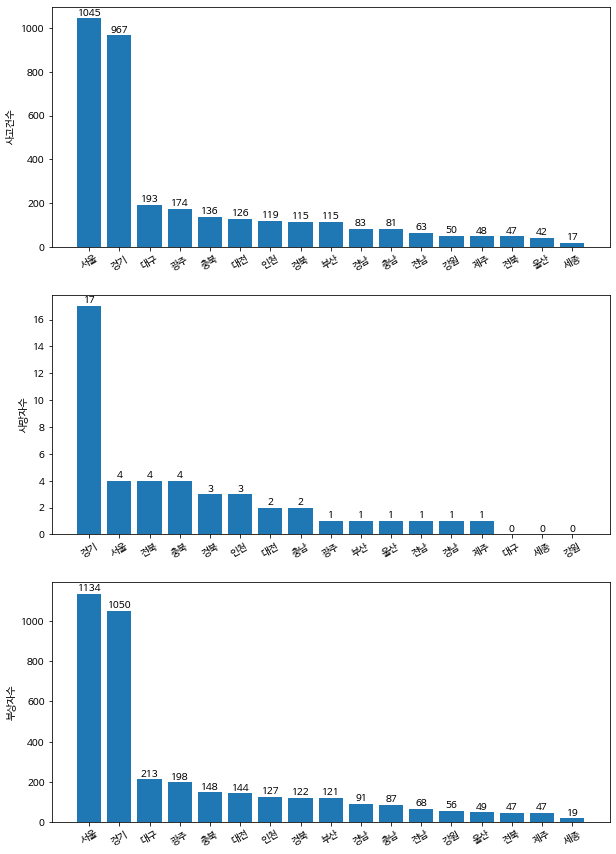

In [69]:
part = data[data["종류"]=="시도"]

fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(part["수치"].unique()):
    temp = part[part["수치"]==value].groupby("대구분")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=30)
plt.show()

### 시군구별

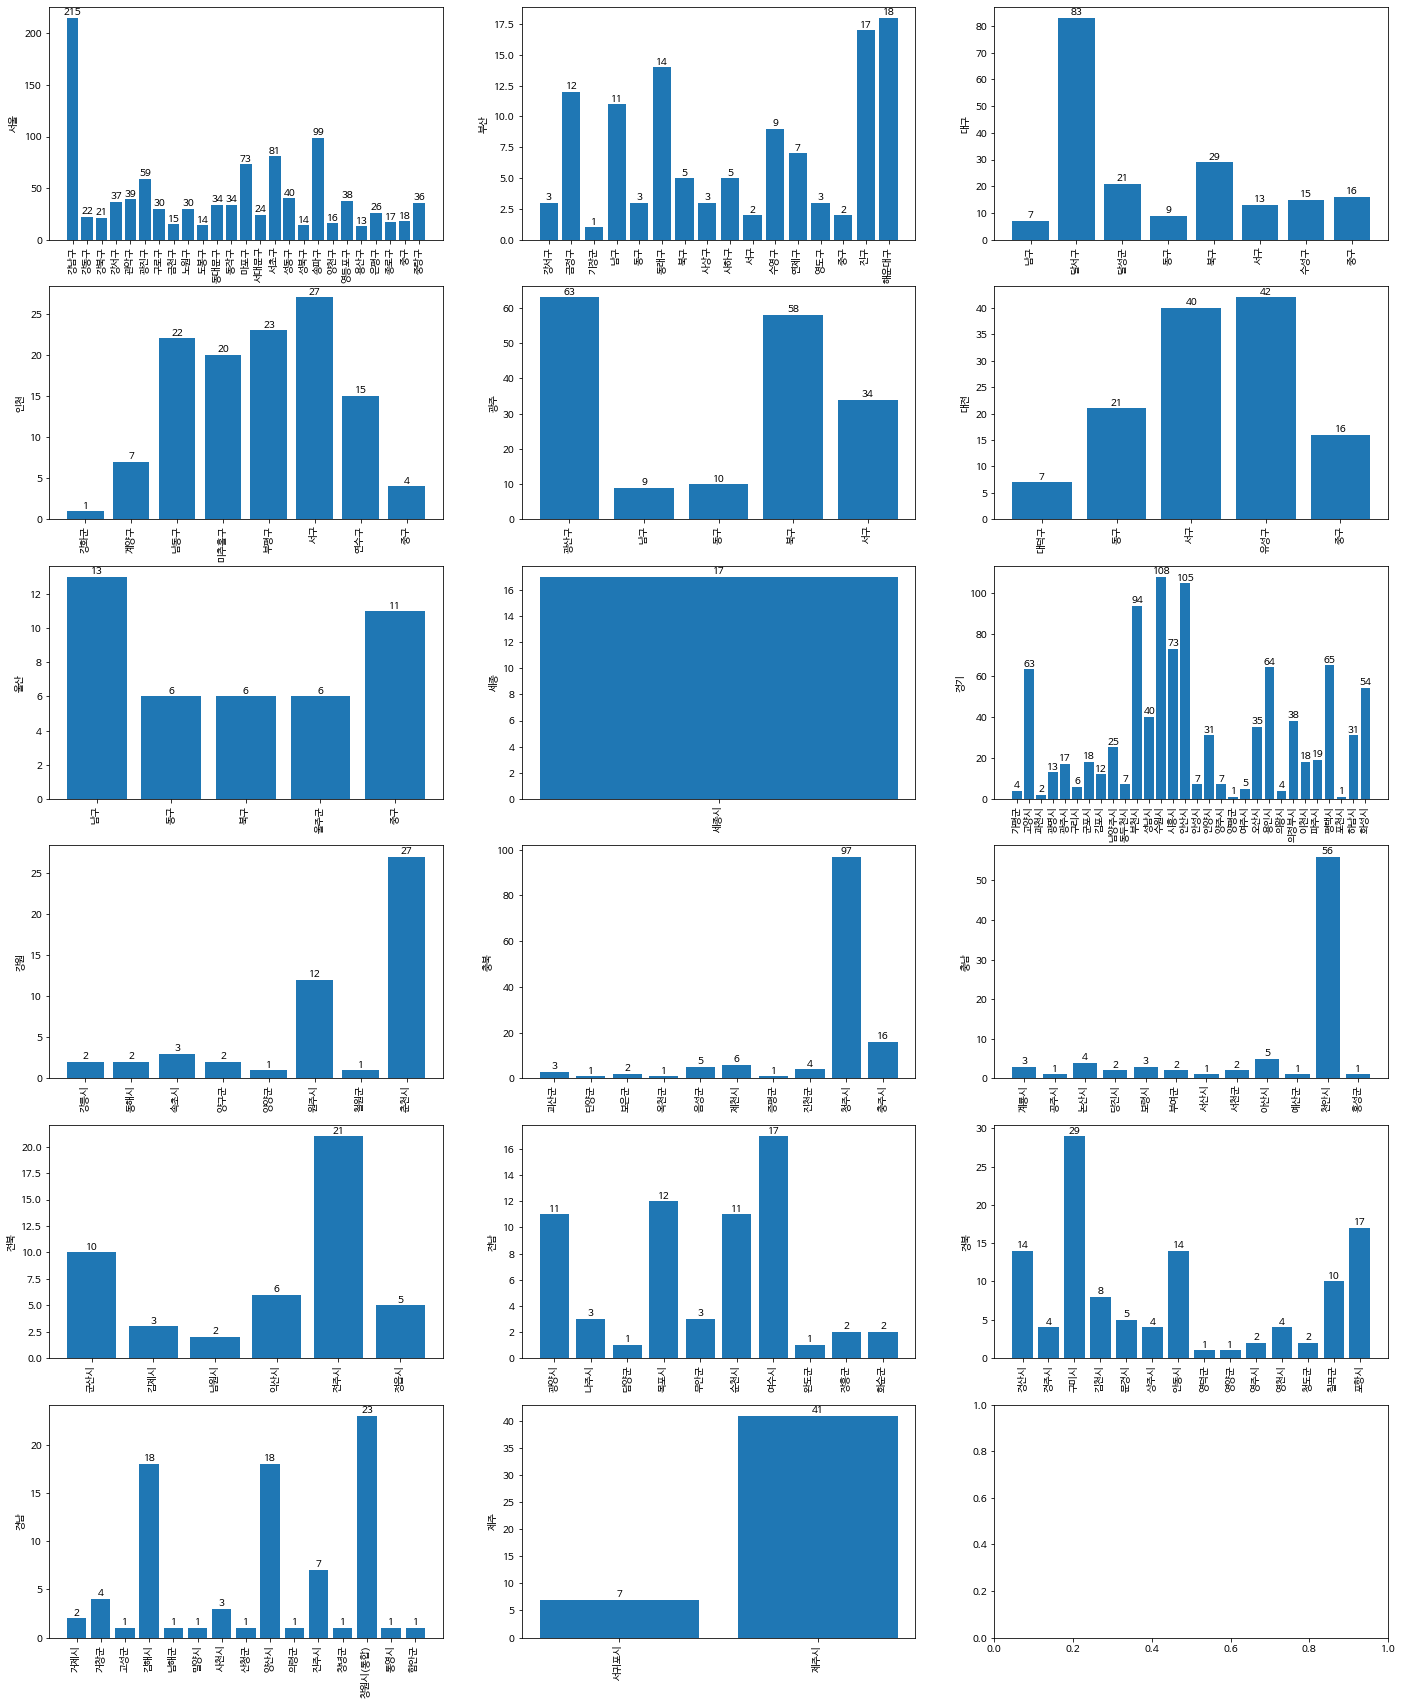

In [75]:
part = data[(data["종류"]=="시도") & (data["수치"]=="사고건수")]

fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(24, 30))

for i, value in enumerate(part["대구분"].unique()):
    temp = part[part["대구분"]==value].groupby("소구분")["수"].sum().sort_index(ascending=True)
    x = temp.index
    y = temp
    p = ax[i//3, i%3].bar(x=x, height=y)
    ax[i//3, i%3].bar_label(p)
    ax[i//3, i%3].set_ylabel(value)
    ax[i//3, i%3].set_xticks(ax[i//3, i%3].get_xticks(), ax[i//3, i%3].get_xticklabels(), rotation=90)

plt.show()

### 월별

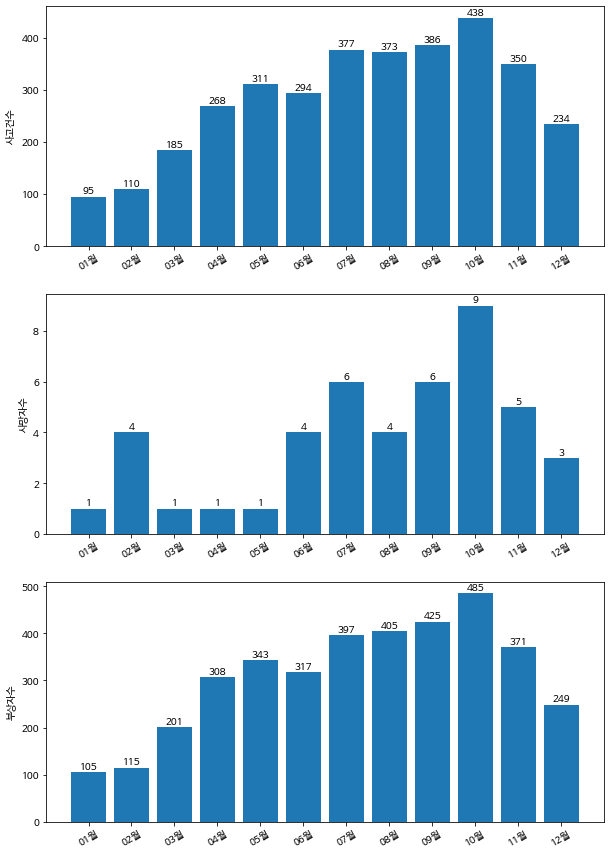

In [79]:
part = data[data["종류"]=="월"]

fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(part["수치"].unique()):
    temp = part[part["수치"]==value].groupby("대구분")["수"].sum().sort_index(ascending=True)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=30)
plt.show()

### 요일별

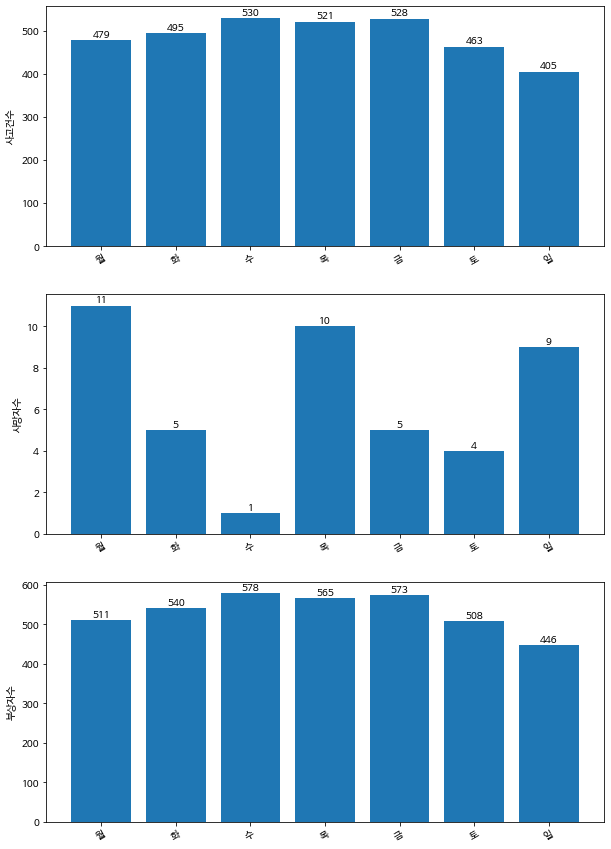

In [126]:
part = data[data["종류"]=="요일"]

fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(part["수치"].unique()):
    temp = part[part["수치"]==value].groupby("대구분")["수"].sum().reindex(index=["월", "화", "수", "목", "금", "토", "일"])
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=30)
plt.show()

### 시간대별

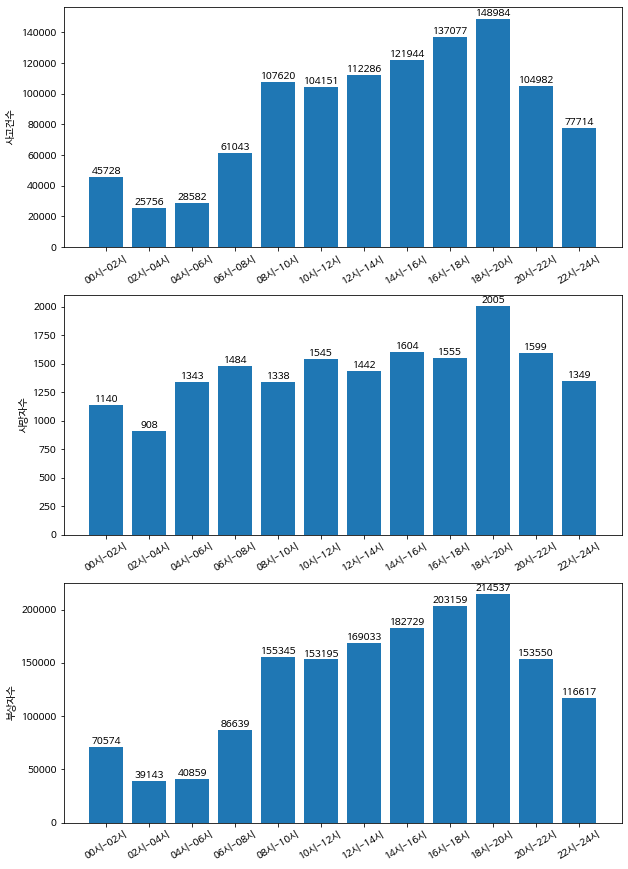

In [82]:
part = data[data["종류"]=="시간대"]

fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(part["수치"].unique()):
    temp = part[part["수치"]==value].groupby("대구분")["수"].sum().sort_index(ascending=True)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=30)
plt.show()

### 법규위반별

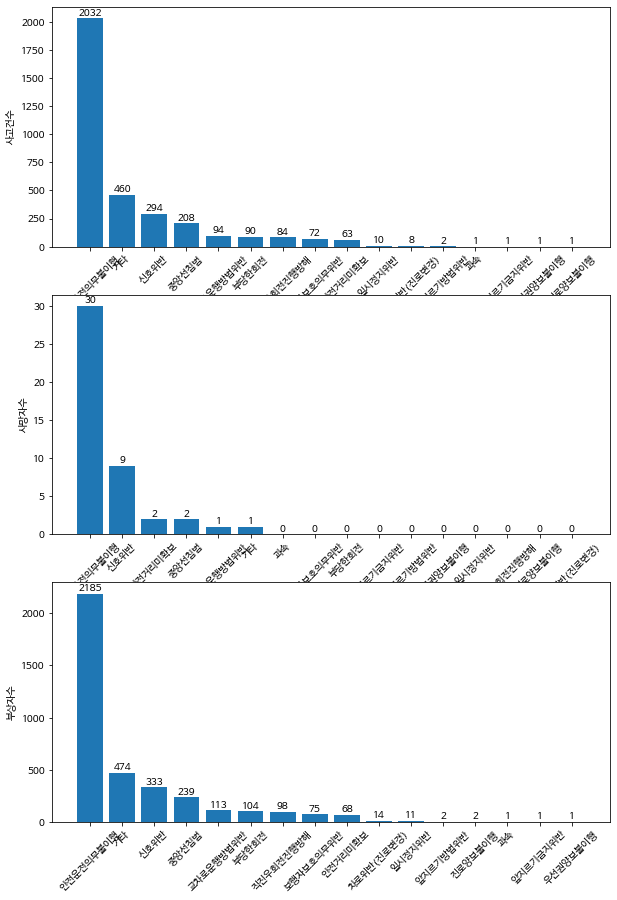

In [92]:
part = data[data["종류"]=="법규위반"]

fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(part["수치"].unique()):
    temp = part[part["수치"]==value].groupby("소구분")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=45)
plt.show()

### 도로종류별

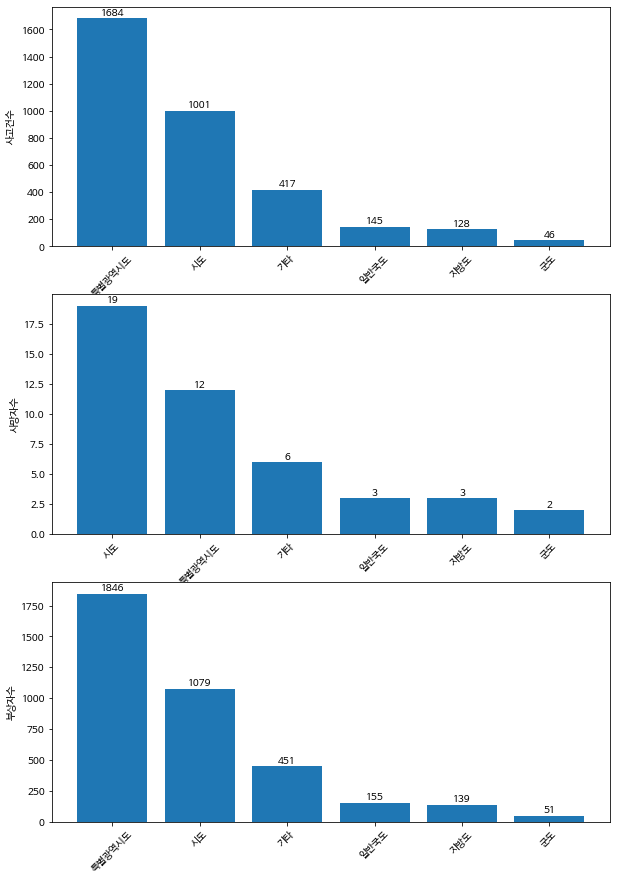

In [94]:
part = data[data["종류"]=="도로종류"]

fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(part["수치"].unique()):
    temp = part[part["수치"]==value].groupby("대구분")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=45)
plt.show()

### 도로형태별

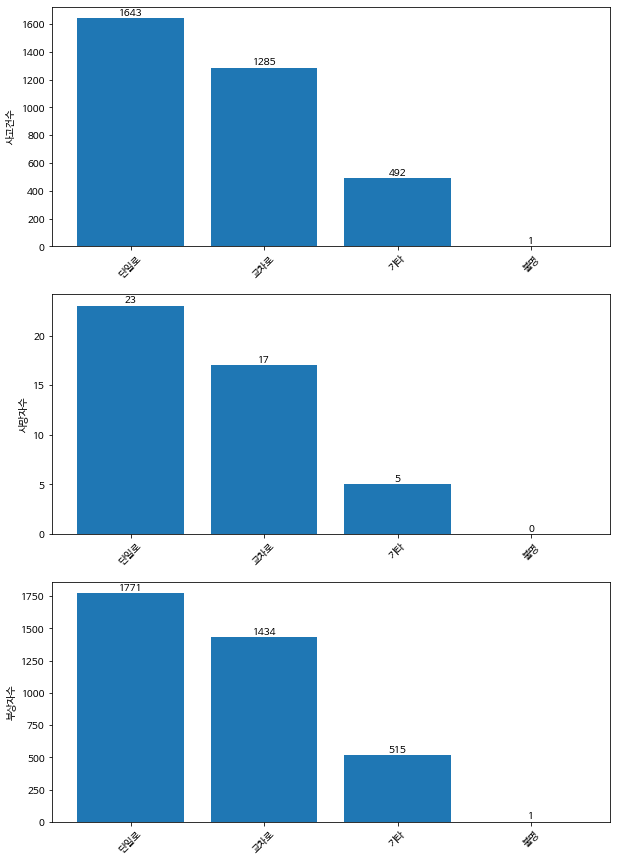

In [95]:
part = data[data["종류"]=="도로형태"]

fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(part["수치"].unique()):
    temp = part[part["수치"]==value].groupby("대구분")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=45)
plt.show()

### 교차로형태별

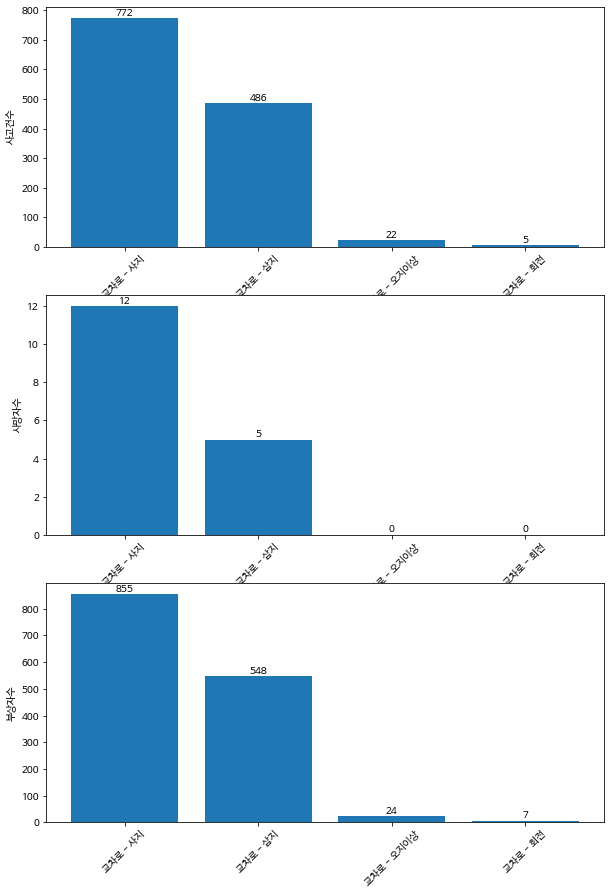

In [97]:
part = data[(data["종류"]=="교차로형태") & (data["대구분"]=="교차로")]

fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
for i, value in enumerate(part["수치"].unique()):
    temp = part[part["수치"]==value].groupby("소구분")["수"].sum().sort_values(ascending=False)
    x = temp.index
    y = temp
    p = ax[i].bar(x=x, height=y)
    ax[i].bar_label(p)
    ax[i].set_ylabel(value)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=45)
plt.show()